##### Week 5:
Building a Classifier
- Overview of Machine Learning
- Feature Engineering
- One hot encoding to encode categorical variables for use in a model
- Creating training and test data

Coding tasks:
The file brfss.csv contains a subset of the responses and variables from the [2019 Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/). This dataset can be downloaded using this link: [https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing](https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing).

A detailed Codebook can be found [here](https://www.cdc.gov/brfss/annual_data/2019/pdf/codebook19_llcp-v2-508.HTML).

Our target variable is the CHECKUP1 column, which contains the responses to the question "About how long has it been since you last visited a doctor for a routine checkup?   [A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]" Specifically, we want to try and predict if someone gives an answer besides "Within past year (anytime less than 12 months ago)".

First, create a new coumn, "target" by converting this to a binary outcome. After you do this, drop the CHECKUP1 column from your dataframe so that you don't accidentally make predictions based off of it.

Then, experiment with making a logistic regression model to predict the target variable using one or more of the other columns. Note that you will need to convert the precictor columns into dummy variable prior to fitting a model. What do you find?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from cm import plot_confusion_matrix

In [42]:
brfss = pd.read_csv('../data/brfss.csv')

In [43]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True


In [44]:
brfss['CHECKUP1'].value_counts()

Within past year (anytime less than 12 months ago)         215875
Within past 2 years (1 year but less than 2 years ago)      24212
Within past 5 years (2 years but less than 5 years ago)     11880
5 or more years ago                                          9325
Never                                                         757
Name: CHECKUP1, dtype: int64

In [45]:
brfss['target'] = brfss['CHECKUP1'].replace(['Within past year (anytime less than 12 months ago)',
                                             'Within past 2 years (1 year but less than 2 years ago)',
                                             'Within past 5 years (2 years but less than 5 years ago)',
                                             '5 or more years ago',
                                             'Never'],
                                           [0,1,1,1,1])    

In [46]:
brfss['target'].value_counts()

0    215875
1     46174
Name: target, dtype: int64

In [47]:
brfss = brfss.drop('CHECKUP1', 1)

In [48]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Yes,Yes,No,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,0
1,Fair,Yes,"Yes, only one",No,No,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,0
2,Good,Yes,More than one,No,Yes,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,0
3,Very good,Yes,"Yes, only one",No,No,No,No,No,No,Yes,...,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,0
4,Poor,Yes,"Yes, only one",No,No,Yes,No,No,No,Yes,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,0


In [49]:
categorical_variables = ['GENHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST']
brfss = pd.get_dummies(brfss, columns = categorical_variables)

In [52]:
brfss.head()

,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,ADDEPEV3,...,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very good,HLTHPLN1_No,HLTHPLN1_Yes,PERSDOC2_More than one,PERSDOC2_No,"PERSDOC2_Yes, only one",MEDCOST_No,MEDCOST_Yes
0,Yes,Yes,No,No,No,No,No,No,No,No,...,1,0,0,0,1,0,0,1,1,0
1,No,No,No,No,No,No,No,No,No,No,...,0,0,0,0,1,0,0,1,1,0
2,Yes,No,No,No,No,No,No,No,No,No,...,1,0,0,0,1,1,0,0,1,0
3,No,No,No,No,No,Yes,No,No,Yes,No,...,0,0,1,0,1,0,0,1,1,0
4,No,Yes,No,No,No,Yes,No,No,Yes,No,...,0,1,0,0,1,0,0,1,1,0


In [78]:
# logistic regression model
X = brfss[['GENHLTH_Good','HLTHPLN1_No','PERSDOC2_More than one','MEDCOST_No']]                 # Predictor variable (as a DataFrame)
y = brfss['target']                   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [79]:
logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X_train, y_train)          # Fit it to the training data

LogisticRegression()

/Users/congwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


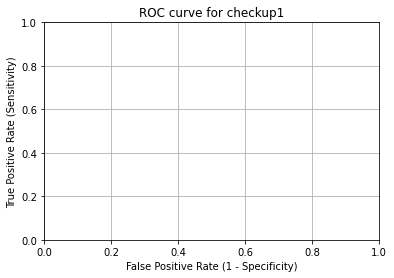

In [80]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for checkup1')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [81]:
roc_auc_score(y_test, y_pred_prob)

0.6048292998648759

In [82]:
y_pred = logreg.predict(X_test)

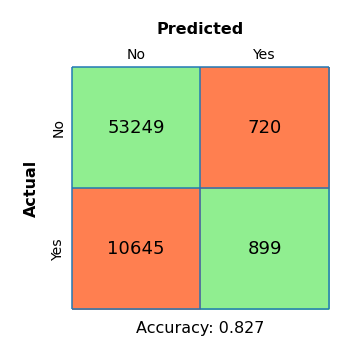

In [83]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')